In [1]:
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister
from qiskit import Aer, execute, BasicAer
from qiskit.visualization import plot_bloch_multivector, plot_histogram

In [2]:
def subtraction(circuit,x,y,c,N):
    for i in range(N-1,0,-1):
        circuit.cx(x[i],y[i])
    
    for i in range(N-2,0,-1):
        circuit.cx(x[i],x[i+1])
    
    for i in range(1,N):
        circuit.ccx(y[i-1],x[i-1],x[i])
        circuit.cx(x[i],y[i])
    
    circuit.ccx(y[N-1],x[N-1],c)
    
    for i in range(N-2,-1,-1):
        circuit.ccx(y[i],x[i],x[i+1])
    
    for i in range(1,N-1):
        circuit.cx(x[i],x[i+1])
    
    circuit.cx(x[N-1],c)
    
    for i in range(N-1,0,-1):
        circuit.cx(x[i],y[i])

In [3]:
n=4
A=8
B=5
x = QuantumRegister(n)
c = QuantumRegister(1)
y = QuantumRegister(n)
clas = ClassicalRegister(n+1)
circuit = QuantumCircuit(y,x,c,clas)
s_A=bin(int(A))[2:].zfill(n)
print(A)
print(s_A)
s_B=bin(int(B))[2:].zfill(n)
print(B)
print(s_B)
for i in range(0, n):
    if s_B[i] == '1':
        circuit.x(x[n-1-i])
for i in range(0, n):
    if s_A[i] == '1':
        circuit.x(y[n-1-i])
circuit.x(c[0])
subtraction(circuit,x,y,c,n)
for i in range(0,n):
    circuit.measure(y[i],clas[i])
circuit.measure(c,clas[n])

8
1000
5
0101


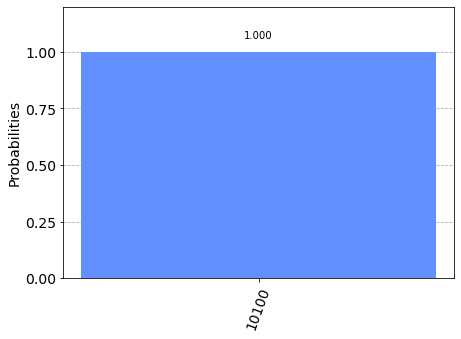

In [4]:
backend = BasicAer.get_backend('qasm_simulator')
simulation = execute(circuit, backend=backend ,shots=10)
sim_result = simulation.result()
counts_result = sim_result.get_counts(circuit)
plot_histogram(counts_result)